In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
from vit_keras import vit, utils
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow import keras
import pandas as pd
from tensorflow.keras.preprocessing import image

2023-10-18 10:13:19.467370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 10:13:19.570108: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-18 10:13:20.045019: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/kannika/miniconda3/envs/vit-tf/lib/
2023-10-18 10:13:20.045069: W tensorflow/com

# Load model

In [3]:
model_dir = "/media/tohn/HDD/rheology2023/ViTModel/Classification/Blood_Viscosity/_3classes/fold1/R1/models/ViTb32_3Class_fold1_R1.h5"
model = keras.models.load_model(model_dir)
height = width = model.input_shape[1]
print(height, width)
model.summary()

2023-10-18 10:13:37.855109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 10:13:38.264398: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9631 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5


384 384
Model: "ViT_BloodClass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 384, 384, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 12, 12, 768)       2360064   
                                                                 
 reshape (Reshape)           (None, 144, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 145, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 145, 768)         111360    
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 145, 768),       7087872   
 (TransformerBlock)           (None, 12, Non

# DATA

In [4]:
fold = 1

In [5]:
df_2dFFT = pd.read_csv("/home/kannika/code/Rheology2023/Rheology_Blood/Dataset_Rheology_Blood_Viscosity_HN_NBL-2dFFTdataset-3channels-6Fold-splitclass.csv")
train_2dFFT = df_2dFFT[df_2dFFT['fold']!=fold].reset_index(drop=True)
print("Fold Train set", set(train_2dFFT['fold']))
print(train_2dFFT.shape)

test_2dFFT = df_2dFFT[df_2dFFT['fold']==fold].reset_index(drop=True)
print("Fold Test set", set(test_2dFFT['fold']))
print(test_2dFFT.shape)

test_2dFFT.head()

Fold Train set {2, 3, 4, 5, 6}
(240, 15)
Fold Test set {1}
(48, 15)


,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image_name,image_path,image_folder,folder_source,classes,Code,subclass,fold,dt,classes_binary
0,0,0,0,237,237,HN35_D0_30HZ_20XINF_UWELL_25660131_162433_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN35_D0_30HZ_20XINF_UWELL_25660131_162433,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1
1,1,1,1,234,234,HN35_D0_30HZ_20XINF_UWELL_25660131_161754_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN35_D0_30HZ_20XINF_UWELL_25660131_161754,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1
2,2,2,2,324,324,HN43_D0_30HZ_20XINF_UWELL_25660330_153259_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN43_D0_30HZ_20XINF_UWELL_25660330_153259,SSD_Backup,HN,HN43,No_Splenectomy,1,"[2, 5, 7]",1
3,3,3,3,268,268,HN38_D0_30HZ_20XINF_UWELL_25660223_145146_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN38_D0_30HZ_20XINF_UWELL_25660223_145146,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1
4,4,4,4,239,239,HN35_D0_30HZ_20XINF_UWELL_25660131_162844_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN35_D0_30HZ_20XINF_UWELL_25660131_162844,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (height, width)
BATCH_SIZE = 16

### Get data Loder
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range=20,
                    brightness_range=[0.5, 1.5],
                    shear_range=0.5,
                    horizontal_flip = False,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train_2dFFT,
        directory = None,
        x_col = 'image_path',
        y_col = 'subclass',
        target_size = (height, width),
        batch_size=BATCH_SIZE,
        color_mode= 'rgb',
        class_mode='categorical')


#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

Found 240 validated image filenames belonging to 3 classes.
{0: 'No_Splenectomy', 1: 'Normal', 2: 'Splenectomy'}


# Prediction

In [7]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

In [8]:
#Predict
pred_list = list()
prob_list = list()
img_path=test_2dFFT['image_path'].tolist()
for i in range(0,len(img_path)):
    #print(i)
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

2023-10-18 10:14:07.653071: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-10-18 10:14:07.997058: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 0s 41ms/step


In [9]:
predict

array([0.06814314, 0.05959819, 0.8722586 ], dtype=float32)

In [10]:
result

2

In [11]:
print(len(pred_list))
print(len(prob_list))

test_2dFFT['category'] = pred_list
test_2dFFT['Prob'] = prob_list
test_2dFFT.head()

48
48


,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image_name,image_path,image_folder,folder_source,classes,Code,subclass,fold,dt,classes_binary,category,Prob
0,0,0,0,237,237,HN35_D0_30HZ_20XINF_UWELL_25660131_162433_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN35_D0_30HZ_20XINF_UWELL_25660131_162433,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1,No_Splenectomy,0.874427
1,1,1,1,234,234,HN35_D0_30HZ_20XINF_UWELL_25660131_161754_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN35_D0_30HZ_20XINF_UWELL_25660131_161754,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1,No_Splenectomy,0.880909
2,2,2,2,324,324,HN43_D0_30HZ_20XINF_UWELL_25660330_153259_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN43_D0_30HZ_20XINF_UWELL_25660330_153259,SSD_Backup,HN,HN43,No_Splenectomy,1,"[2, 5, 7]",1,Splenectomy,0.848918
3,3,3,3,268,268,HN38_D0_30HZ_20XINF_UWELL_25660223_145146_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN38_D0_30HZ_20XINF_UWELL_25660223_145146,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1,Splenectomy,0.879296
4,4,4,4,239,239,HN35_D0_30HZ_20XINF_UWELL_25660131_162844_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN35_D0_30HZ_20XINF_UWELL_25660131_162844,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1,No_Splenectomy,0.877486


In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix

act = test_2dFFT['subclass'].array
pred = test_2dFFT['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 60.416666666666664%
                precision    recall  f1-score   support

No_Splenectomy       0.50      0.33      0.40        12
        Normal       0.81      0.92      0.86        24
   Splenectomy       0.23      0.25      0.24        12

      accuracy                           0.60        48
     macro avg       0.52      0.50      0.50        48
  weighted avg       0.59      0.60      0.59        48



# Confusion matrix

Text(0.5, 20.046874999999993, 'Predicted label')

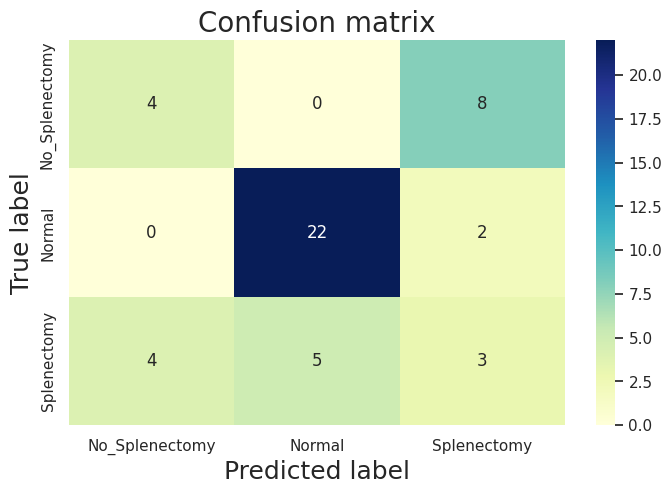

In [13]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)